<a href="https://colab.research.google.com/github/Gabrielcamargos28/Classificacao_de_Sementes_com_Pytorch/blob/main/CassificacaoSementesDeTrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salvando arquivo de estudo

In [2]:
from urllib.request import urlretrieve
url = 'https://raw.githubusercontent.com/alura-cursos/Primeiros_passos_pytorch/main/sementes.csv'
urlretrieve(url,'sementes.csv')

('sementes.csv', <http.client.HTTPMessage at 0x7ac3a0802a40>)

Subindo o arquivo sementes.csv para o Colab e visualizando suas primeiras linhas temos:

In [3]:
import pandas as pd
dados = pd.read_csv('sementes.csv')
dados.head()

,Área,Perímetro,Compacidade,Comprimento,Largura,Assimetria,Comprimento do sulco,Espécie
0,15.26,14.84,871.000,5.763,3.312,2.221,5.220,0
1,14.88,14.57,8.811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,905.000,5.291,3.337,2.699,4.825,0
3,13.84,13.94,8.955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,9.034,5.658,3.562,1.355,5.175,0


Essa tabela possui sete colunas com informações sobre a semente e uma coluna que identifica a espécie da semente. A semente pode ser da espécie 0, 1 ou 2.

O objetivo do nosso algoritmo de machine learning é aprender com essa tabela de dados. Assim, quando passarmos novos valores de Área, Perímetro, Compacidade e etc o algoritmo será capaz de retornar um valor de Espécie da semente. **É comum chamarmos as colunas que contém as informações de entrada de X**. **Já a coluna que é nosso alvo de identificação chamamos de y.** Podemos separar os dados em X e y através dos comandos:

In [6]:
X = dados.drop(['Espécie'], axis=1).values
y = dados['Espécie'].values

Em problemas supervisionados de machine learning nós precisamos construir um modelo que consiga generalizar um problema. Após o treinamento, um modelo adequado deve conseguir fazer boas estimativas tanto em dados que ele viu durante o treinamento quanto em dados que não viu durante o treino. Por este motivo, vamos separar a base de dados em duas partes. Uma parte para treino e outra para teste. O teste nós vamos guardar para depois, para verificar se o modelo retorna bons resultados.

Para dividir os dados em treino e teste vamos usar a biblioteca scikit-learn. Apesar deste ser um tutorial de Pytorch a forma como esse processo é feito com a scikit-learn é mais intuitivo.

In [10]:
from sklearn.model_selection import train_test_split

X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.2)

Assim, temos 20% dos dados separados para o teste. Os outros 80% ficam para o treino. Essa porcentagem foi escolhida de forma arbitrária. Não existe uma regra muito bem definida para a escolha, mas normalmente é deixada uma porcentagem maior para o treino e menor para o teste. Agora finalmente podemos importar a biblioteca torch. Além disso, vamos transformar os arrays do numpy Xtreino,X_teste,y_treino,y_teste em tensores.

In [11]:
import torch
X_treino = torch.FloatTensor(X_treino)
X_teste = torch.FloatTensor(X_teste)
y_treino = torch.LongTensor(y_treino)
y_teste = torch.LongTensor(y_teste)

Com isto, podemos criar um modelo de rede neural. Por isso, vamos importar o módulo de redes neurais nn e o functional para que possamos chamar as funções de ativação.

In [13]:
import torch.nn as nn
import torch.nn.functional as F


A nossa rede neural possui sete entradas e três saídas. Essas são respectivamente as colunas de X e o número de classes possíveis que temos em y. Além disso, foram adicionadas duas camadas escondidas, uma com 14 neurônios e outra com 49 neurônios. O número de neurônios das camadas escondidas foi escolhido de forma arbitrária. Para criar a estrutura da rede definimos uma classe que dei o nome de Modelo. Dentro da classe modelo definimos o init que vai iniciar a estrutura da rede.

In [30]:
class Modelo(nn.Module):
  def __init__(self,entrada=7,camada_escondida1=14,camada_escondida2=49,saida=3):
    super().__init__()
    self.fc1 = nn.Linear(entrada,camada_escondida1)
    self.fc2 = nn.Linear(camada_escondida1, camada_escondida2)
    self.out = nn.Linear(camada_escondida2, saida)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

A seguir foi colocado uma imagem de exemplo de uma rede neural com 7 entradas, 3 saídas e duas camadas escondidas cada uma com 14 neurônios. Nessa imagem, cada um dos círculos são os neurônios de uma camada. As linhas são definidas por pesos, valores que ligam cada neurônio através de uma multiplicação. As camadas escondidas são as camadas de neurônios intermediárias entre a primeira camada (entrada) e a última camada (saída).

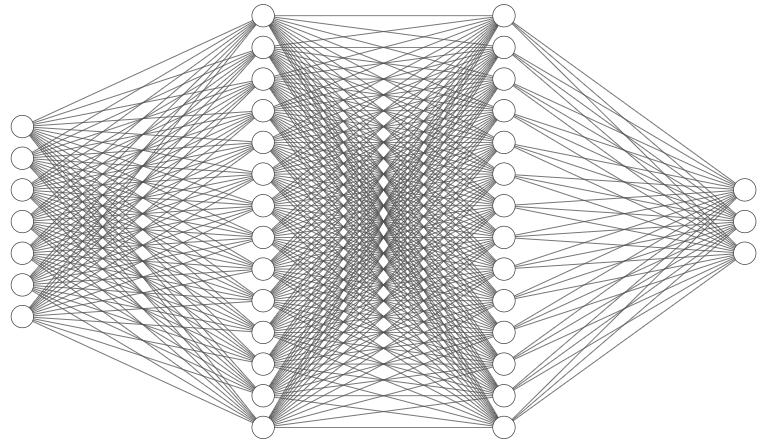

Ainda dentro da classe modelo definimos a função forward que será responsável pela propagação da rede. A propagação é o que leva a entrada até a saída. Cada uma das conexões de uma rede como a da figura de exemplo é ligada através de pesos e a saída de cada camada da rede é feita usando uma função de ativação. Aqui vamos utilizar a função de ativação ReLU que retorna sempre valores positivos. A nossa saída da rede é sempre positiva e por este motivo é conveniente utilizar a ReLU.

Instanciando a rede

In [31]:
modelo_classificacao_sementes = Modelo()

Além de definir a rede neural, precisamos verificar se a rede está levando a entrada para um resultado próximo da saída desejada. Nós fazemos isso através de uma função objetivo ou função de custo:

In [32]:
funcao_objetivo = nn.CrossEntropyLoss()

Na primeira tentativa, a rede neural não irá obter uma saída satisfatória. Isso acontece porque os pesos que ligam cada um dos neurônios são definidos de forma aleatória. Por isso, precisamos fazer a correção desses pesos. O otimizador que será utilizado nesse processo é definido por:

In [33]:
otimizador = torch.optim.Adam(modelo_classificacao_sementes.parameters(), lr=0.01)

Finalmente vamos treinar a rede neural. O processo de propagação e retropropagação será repetido por 100 épocas. Assim, esperamos corrigir os pesos para obter uma rede que transforma corretamente a entrada em uma previsão da classe da semente.

In [34]:
epocas = 100
custos = []
for i in range(epocas):
  y_predito = modelo_classificacao_sementes.forward(X_treino)
  custo = funcao_objetivo(y_predito, y_treino)
  custos.append(custo)

  otimizador.zero_grad()
  custo.backward()
  otimizador.step()

Por fim, podemos tentar prever valores de y passando como entrada o X_teste. Assim temos como comparar o Y e o YHat que é o valor estimado. Aqui estão as dez primeiras linhas da minha tabela de resultado. A última coluna da tabela retorna 1 para estimativas corretas e zero para as incorretas.

In [36]:
preds = []

with torch.no_grad():
  for val in X_teste:
    y_predito = modelo_classificacao_sementes.forward(val)
    preds.append(y_predito.argmax().item())

df = pd.DataFrame({'Y': y_teste, 'YHat': preds})
df['Correto'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df

,Y,YHat,Correto
0,2,0,0
1,2,2,1
2,0,0,1
3,1,1,1
4,0,0,1
5,1,1,1
6,0,0,1
7,2,2,1
8,1,1,1
9,1,0,0


Referencias:
https://www.alura.com.br/artigos/primeiros-passos-com-pytorch
O canal Peixe Babel: https://www.youtube.com/watch?v=Vfzm1-cfLuc&list=PL3Wx5P4NOzUhnQwaH2dAudaGDLoF0AY5U